# Primer Examen Parcial

### ITESM - Escuela de Ingeniería y Ciencias
#### Maestría en Ciencias Computacionales
#### Tópicos AI 2
##### Dr. Luis Eduardo Falcón Morales
##### Semestre Febrero-Junio 2021

---

## Carlos E. Hdz Rincón - A01181616

# Prerequisitos y preparamiento de ambiente

## Instalación de dependencias

Descomentamos la siguiente línea para poder instalar las dependencias de Python necesarias.

In [ ]:
#!pip install keras tensorflow matplotlib numpy pandas

## Imports

In [ ]:
from IPython.display import display

import time
import random

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix, classification_report

from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping
import tensorflow as tf


# Set random seeds for all libraries
RANDOM_SEED = 17

#np.random.seed(RANDOM_SEED)
#tf.random.set_random_seed(RANDOM_SEED)

# Connect to Google Drive if hosting the files there
#from google.colab import drive
#drive.mount('/content/drive')

## Tools

In [ ]:
def print_marquee(msg: str):
    """
    Prints a centered message with a marquee of * 
    """
    marquee_width = len(msg) + 4
    print("\n")
    print("*" * marquee_width)
    print(f"* {msg} *")
    print("*" * marquee_width)

In [ ]:
def train_model(model_to_fit: tf.keras.models.Model,
                epochs: int,
                train_data: tuple,
                validation_data: tuple,
                callbacks: list = None,
                batch_size=None):

    t = time.process_time()
    
    trained_model = model_to_fit.fit(train_data[0],
                                     train_data[1],
                                     validation_data=validation_data,
                                     epochs=epochs,
                                     callbacks=callbacks,
                                     batch_size=batch_size)
    
    elapsed_time = time.process_time() - t
    
    print(f"\n\n ********* Training time: {elapsed_time} s.")
    return trained_model

def graph_loss_accuracy(h_model,
                        subtitle: str = ""):
    
    num_records = len(h_model.history["accuracy"])
    
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,num_records),h_model.history["accuracy"],label="train_acc")
    plt.plot(np.arange(0,num_records),h_model.history["val_accuracy"],label="val_acc")
    plt.title("Training and Validation Accuracy" 
              + f" ({subtitle})" if subtitle else "")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.figure()
    plt.plot(np.arange(0,num_records),h_model.history["loss"],label="train_loss") 
    plt.plot(np.arange(0,num_records),h_model.history["val_loss"],label="val_loss")
    plt.title("Training and Validation Loss" 
              + f" ({subtitle})" if subtitle else "")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

# Helper functions for reporting

def print_dataset_prediction_report(y_pred,
                                    y_real,
                                    labels: list=None):
    
    #y_pred = np.round(y_pred).astype(int)

    print_marquee("Classification Report")
    print(classification_report(y_real.argmax(axis=1),
                                y_pred.argmax(axis=1),
                                target_names=labels))
    
    print_marquee("Confusion Matrix")
    print(confusion_matrix(y_real.argmax(axis=1),
                           y_pred.argmax(axis=1)))


def evaluate_model(model_to_fit: tf.keras.models.Model,
                   epochs: int,
                   train_tuple: tuple,
                   validation_tuple: tuple,
                   test_tuple: tuple = None,
                   callbacks: list = None,
                   batch_size = None,
                   labels: list = None) -> tf.keras.models.Model:

    trained_model_history = train_model(model_to_fit,
                                epochs,
                                train_tuple,
                                validation_tuple,
                                callbacks=callbacks,
                                batch_size=batch_size)
    print_marquee("Model Summary")                                
    model_to_fit.summary()

    print_marquee("Validation Dataset Confusion Matrix")

    val_model_predictions = model_to_fit.predict(validation_tuple[0],
                                                 batch_size=batch_size)
    
    print_dataset_prediction_report(val_model_predictions,
                                    validation_tuple[1],
                                    labels)


    if test_tuple:

        print_marquee("Test Dataset Confusion Matrix")

        test_model_predictions = model_to_fit.predict(test_tuple[0],
                                                      batch_size=batch_size)
        
        print_dataset_prediction_report(test_model_predictions,
                                        test_tuple[1],
                                        labels)

    print_marquee("Train/Val Accuracy and Loss graphs")

    # If using early stopping, it might be the case that we used less epochs than
    #  requested
    subtitle = f"Epochs: {len(trained_model_history.history['accuracy'])}"
    
    graph_loss_accuracy(trained_model_history,
                        subtitle=subtitle)
    
    return model_to_fit, trained_model_history

# Introducción

Responder a las preguntas e incisos siguientes siguiendo la estructura del archivo de Jupyter Notebook:

https://colab.research.google.com/drive/17xsqvdJp-EY-CD3k9FyeaXKO0vBR4Qbf?usp=sharing

* Estaremos usando la base de datos llamada Fashion-MNIST:
https://www.kaggle.com/zalando-research/fashionmnist
* Cargaremos los datos Fashion-MNIST a través de la librería de Keras. Estos vienen separados en 60 mil de entrenamiento y 10 mil de prueba.
* Sin embargo, deberás generar otra partición de los 60 mil para obtener los que usaremos en esta actividad: 50 mil de entrenamiento, 10 mil de validación y 10 mil de prueba.
* Como funciones de activación puedes usar `sigmoid`, `tanh` o `relu`.
* La función de activación de la neurona de salida deberá ser siempre la `softmax`, y la función de costo `categorical cross-entroy`, ya que tenemos 10 clases diferentes.
* Por el momento en esta Tarea no modifiques los argumentos del compilado del modelo. Estaremos utilizando el método del gradiente descendente estocástico (SGD).
* En todas las soluciones encontradas deberás mostrar los mejores parámetros
encontrados y las gráficas de las curvas de aprendizaje. 

NOTA: Aunque son criterios para redes neuronales profundas, puedes irte familiarizando con algunas reglas generales dadas por Yoshua Bengio: https://arxiv.org/abs/1206.5533 

## Carga de datos

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train_val, y_train_val), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Train/Val/Test split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val,
                                                  y_train_val,
                                                  train_size=50000,
                                                  random_state=RANDOM_SEED)


print_marquee("Train")
print(x_train.shape)
print(y_train.shape)

print_marquee("Val")
print(x_val.shape)
print(y_val.shape)

print_marquee("Test")
print(x_test.shape)
print(y_test.shape)



*********
* Train *
*********
(50000, 28, 28)
(50000,)


*******
* Val *
*******
(10000, 28, 28)
(10000,)


********
* Test *
********
(10000, 28, 28)
(10000,)


In [ ]:
# Normalization:
x_train, x_val, x_test = x_train/255.0, x_val/255.0, x_test/255.0

# One-hot encoding:
ytrain = tf.keras.utils.to_categorical(y_train)
yval = tf.keras.utils.to_categorical(y_val)
ytest = tf.keras.utils.to_categorical(y_test)

# Se definen las etiquetas de las clases siguiendo
#  https://www.kaggle.com/zalando-research/fashionmnist

labels = ["T_shirt","Trouser","Pullover","Dress","Coat", "Sandal","Shirt","Sneaker","Bag","Ankle_boot"]

# 1

Haz un pequeño resumen, de máximo una cuartilla, sobre los datos Fashion-MNIST en base al siguiente artículo: https://arxiv.org/abs/1708.07747 



## Fashion-MNIST

La base de datos MNIST es una base de datos grande de dígitos escritos a mano que es comúnmente utilizada para entrenar varios sistemas de procesamiento de imágenes compuestas de 10 clases de dígitos. Fue creado al mezclar muestras de las bases de datos originales de NIST y fue presentada por LeCun et al. en 1998.

A pesar del hecho de que hoy en día Deep Learning es capaz de muchas cosas, la base de datos simples de MNIST se ha convertido en la base de prueba en Deep Learning, sobrepasando a CIFAR10 [Krizhevsky and Hinton, 2009] e ImageNet [Deng et al., 2009] en popularidad en Google Trends.

La razón de por qué MNIST es tan popular tiene que ver con su tamaño que permite a investigadores de Deep Learning a revisar y prototipar rápidamente sus algoritmos. Además, muchas librerías de machine learning proveen funciones auxiliares y ejemplos convenientes que usan MNIST.

Fashion-MNIST es una variante basada en colecciones de imágenes del sitio web de Zalando, una tienda departamental. Cada prenda en Zalando tiene un conjunto de imágenes tomadas por fotógrafos personales que demuestran diferentes aspectos del producto como sus vistas frontales y traseras, detalles y cómo se ven vestidas por modelos. La imagen original tiene un fondo en gris claro y es guardado en formato JPEG de 762 x 1000 pixeles.

La imagen original es escalada a múltiples resoluciones y se usan 70,000 productos únicos. Los productos provienen de diferentes grupos de género: hombres, mujeres, niños y neutrales. Productos completamente blancos no son incluídos ya que tienen un pobre contraste con el fondo. Finalmente las imágenes son tratadas con el siguiente pipeline:

1.	Convertir las imágenes a formato PNG.
2.	Recortar las orillas que se asemejan al color de los pixeles de las esquinas.
3.	Escalar los bordes más largos de la imagen a 28 haciendo un sub-muestreo de pixeles.
4.	Se afilan los pixeles usando un operador Gaussiano del radio una desviación estándar de 1.0.
5.	Se extienden los bordes más cortos a 28 y se pone la imagen al centro.
6.	Se niegan las intensidades de la imagen.
7.	Se convierte la imagen a una escala de grises de 8-bits.

Los datos se etiquetan como: “T_shirt", "Trouser", "Pullover", "Dress", "Coat",  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle_boot".

Finalmente, el dataset es dividido en conjuntos de entrenamiento y de prueba. El de entrenamiento recibe 6,000 ejemplares seleccionados al azar de cada clase. Las imágenes son guardadas en el mismo formato que el dataset MNIST que está diseñado para guardar vectores y matrices multidimensionales.


# 2

En este primer modelo usa solamente el modelo equivalente al perceptrón simple, es decir, una red con su capa de entrada de 784 neuronas, la capa de salida con 10 neuronas y sin capa oculta. Considera además el tamaño del batch igual a 10,000.

Encuentra el mejor modelo modificando solamente en este caso el número de épocas. Recuerda respaldar tu resultado con las curvas de aprendizaje.

---

Se utilizará un máximo de 15000 epochs pero con un `EarlyStopping` que monitorée la minimización del `val_loss` y con una paciencia de 5 epochs.

Esto quiere decir que el entrenamiento durará un máximo de 15000 epochs, pero si el modelo comienza a sobre-entrenarse o el val_loss no mejora después de 5 epochs, el entrenamiento parará y se obtendrá un modelo con los mejores pesos antes de que el `val_loss` comenzara a empeorar.

Con esto lograremos conseguir el número de epochs óptimo para el problema.

Streaming output truncated to the last 5000 lines.
Epoch 5801/15000
5/5 [==============================] - 0s 44ms/step - loss: 0.4332 - accuracy: 0.8527 - val_loss: 0.4347 - val_accuracy: 0.8516
Epoch 5802/15000
5/5 [==============================] - 0s 45ms/step - loss: 0.4294 - accuracy: 0.8540 - val_loss: 0.4346 - val_accuracy: 0.8516
Epoch 5803/15000
5/5 [==============================] - 0s 43ms/step - loss: 0.4350 - accuracy: 0.8533 - val_loss: 0.4346 - val_accuracy: 0.8516
Epoch 5804/15000
5/5 [==============================] - 0s 43ms/step - loss: 0.4351 - accuracy: 0.8525 - val_loss: 0.4346 - val_accuracy: 0.8516
Epoch 5805/15000
5/5 [==============================] - 0s 47ms/step - loss: 0.4312 - accuracy: 0.8545 - val_loss: 0.4346 - val_accuracy: 0.8516
Epoch 5806/15000
5/5 [==============================] - 0s 44ms/step - loss: 0.4299 - accuracy: 0.8545 - val_loss: 0.4346 - val_accuracy: 0.8516
Epoch 5807/15000
5/5 [==============================] - 0s 45ms/step - loss: 0.

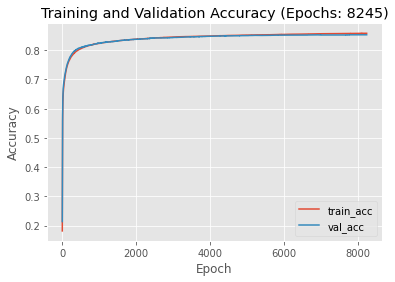

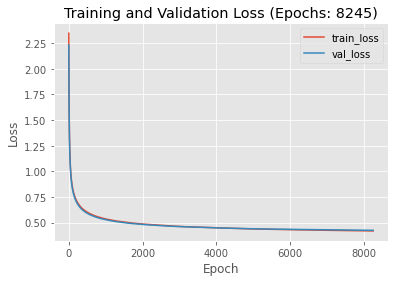

CPU times: user 26min 54s, sys: 1min 4s, total: 27min 58s
Wall time: 27min 29s


In [ ]:
%%time

model_2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                      tf.keras.layers.Dense(10,activation=tf.nn.softmax)],
                                     name="model_2")
model_2.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_2.summary()

evaluate_model(model_2,
               epochs=15000,
               train_tuple=(x_train, ytrain),
               validation_tuple=(x_val, yval),
               test_tuple = (x_test, ytest),
               callbacks=[EarlyStopping(monitor='val_loss',
                                        mode='min',
                                        verbose=1,
                                        patience=5)],
               batch_size=10000,
               labels=labels);

## Observaciones

El mejor modelo se encontró a los 8245 epochs en un tiempo de 1678.16 segundos (27.96 minutos).

Se puede apreciar en las gráficas que la varianza se mantiene mínima y si bien hay sesgo, es entendible dada la arquitectura sencilla de la red. Además, vemos que el resultado en el accuracy de validación y de prueba se mantiene cercano, con lo que podemos concluir que el modelo está generalizando de manera adecuada a datos no vistos durante el entrenamiento.

Tanto en validación como en test se puede apreciar que los abrigos, los pullover y las camisas son las prendas que tiene un F1-score menor, lo que nos dice que el modelo puede estar teniendo problema en distinguir estas prendas por lo similares que son las imágenes. Esto es confirmado también por la matriz de confusión.

Una idea sería aportar más ejemplos de estas clases para que la red pueda aprender mejor o agregar más capas a la red neuronal.

1. ¿Cuántos parámetros (pesos) en total tiene tu modelo?

Layer (type)     |            Output Shape        |      Param #
:---:|:---:|:---:
flatten_5 (Flatten)     |     (None, 784)         |      0         
dense_5 (Dense)         |     (None, 10)           |     7850 

* Total params: 7,850
* Trainable params: 7,850
* Non-trainable params: 0

2. ¿Cuáles son los valores del accuracy de los conjuntos de Train, Validación y Test de tu mejor modelo?

&nbsp;|Accuracy
:---|---:
Train|0.8577
Val|0.8529
Test|0.84


# 3

Este ejercicio es para analizar el efecto del tamaño del bloque (batch size) en el conjunto de datos de entrenamiento utilizados durante el proceso. Utiliza el mejor modelo que hayas encontrado en el ejercicio anterior (el modelo equivalente al perceptrón simple). En cada inciso muestra los resultados para el conjunto de entrenamiento, validación y prueba, así como sus curvas de aprendizaje.


## 1 Batch Gradient Descent

Encuentra el mejor modelo utilizando un tamaño de bloque de 50,000, el total de datos de entrenamiento. ¿Cuál fue el tiempo de entrenamiento de tu mejor modelo?

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 183ms/step - loss: 0.4713 - accuracy: 0.8426 - val_loss: 0.4700 - val_accuracy: 0.8413
Epoch 12556/15000
1/1 [==============================] - 0s 189ms/step - loss: 0.4713 - accuracy: 0.8426 - val_loss: 0.4700 - val_accuracy: 0.8413
Epoch 12557/15000
1/1 [==============================] - 0s 190ms/step - loss: 0.4713 - accuracy: 0.8426 - val_loss: 0.4700 - val_accuracy: 0.8413
Epoch 12558/15000
1/1 [==============================] - 0s 191ms/step - loss: 0.4713 - accuracy: 0.8426 - val_loss: 0.4700 - val_accuracy: 0.8413
Epoch 12559/15000
1/1 [==============================] - 0s 182ms/step - loss: 0.4713 - accuracy: 0.8426 - val_loss: 0.4700 - val_accuracy: 0.8413
Epoch 12560/15000
1/1 [==============================] - 0s 187ms/step - loss: 0.4713 - accuracy: 0.8426 - val_loss: 0.4700 - val_accuracy: 0.8413
Epoch 12561/15000
1/1 [==============================] - 0s 183ms/step - loss: 0.4713

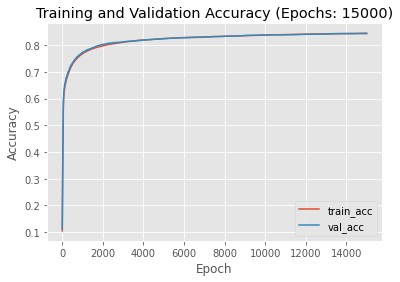

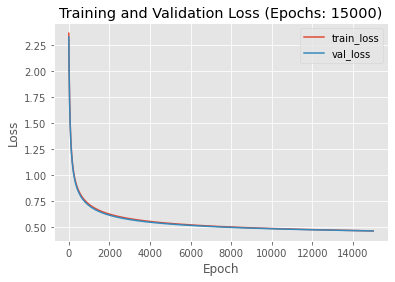

CPU times: user 48min 36s, sys: 1min 36s, total: 50min 13s
Wall time: 46min 20s


In [ ]:
%%time

model_3_1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                           tf.keras.layers.Dense(10,activation=tf.nn.softmax)],
                                          name="model_3_1_bgd")
model_3_1.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

evaluate_model(model_3_1,
               epochs=15000,
               train_tuple=(x_train, ytrain),
               validation_tuple=(x_val, yval),
               test_tuple = (x_test, ytest),
               callbacks=[EarlyStopping(monitor='val_loss',
                                        mode='min',
                                        verbose=1,
                                        patience=5)],
               batch_size=50000,
               labels=labels);

### Observaciones

El mejor modelo se encontró a los 15000 epochs en un tiempo de 3012.79 segundos (50.21 min).

El accuracy de validation y de test se mantiene alrededor de los mismos valores lo cual nos permite apreciar que la red está generalizando de manera apropiada a ejemplos no vistos antes por la red.

De nuevo, tanto la camisa, el abrigo y el pullover tienen los indices más bajos de reconocimiento.

Es importante recalcar que no se provocó un EarlyStopping ya que con cada iteración se conseguía minimizar un poco más el loss, sin embargo, el accuracy ya no crecía demasiado así que es razonable dejar el modelo con el accuracy logrado.

&nbsp;|Accuracy
:---|---:
Train|0.8452
Val|0.8438
Test|0.83




## 2 Stochastic Gradient Descent

Realiza un entrenamiento de 10 épocas utilizando un tamaño de bloque igual a 1. ¿Cuál fue el tiempo de entrenamiento?


Epoch 1/10
50000/50000 [==============================] - 82s 2ms/step - loss: 0.7024 - accuracy: 0.7631 - val_loss: 0.5893 - val_accuracy: 0.8010
Epoch 2/10
50000/50000 [==============================] - 82s 2ms/step - loss: 0.5386 - accuracy: 0.8266 - val_loss: 0.5997 - val_accuracy: 0.8268
Epoch 3/10
50000/50000 [==============================] - 81s 2ms/step - loss: 0.5164 - accuracy: 0.8320 - val_loss: 0.7753 - val_accuracy: 0.7781
Epoch 4/10
50000/50000 [==============================] - 81s 2ms/step - loss: 0.5092 - accuracy: 0.8349 - val_loss: 0.4404 - val_accuracy: 0.8534
Epoch 5/10
50000/50000 [==============================] - 81s 2ms/step - loss: 0.4996 - accuracy: 0.8382 - val_loss: 0.5055 - val_accuracy: 0.8290
Epoch 6/10
50000/50000 [==============================] - 82s 2ms/step - loss: 0.4855 - accuracy: 0.8402 - val_loss: 0.5271 - val_accuracy: 0.8269
Epoch 7/10
50000/50000 [==============================] - 82s 2ms/step - loss: 0.4864 - accuracy: 0.8430 - val_loss: 0

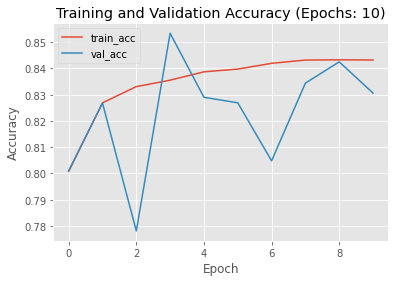

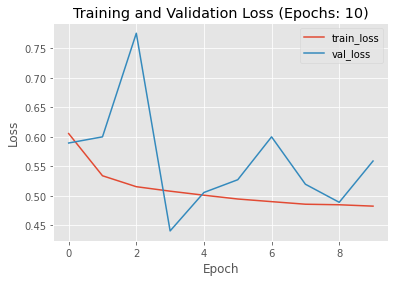

CPU times: user 14min 51s, sys: 2min 33s, total: 17min 24s
Wall time: 13min 49s


In [ ]:
%%time

model_3_2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                           tf.keras.layers.Dense(10,activation=tf.nn.softmax)],
                                          name="model_3_1_sgd")
model_3_2.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

evaluate_model(model_3_2,
               epochs=10,
               train_tuple=(x_train, ytrain),
               validation_tuple=(x_val, yval),
               test_tuple = (x_test, ytest),
               #callbacks=[EarlyStopping(monitor='val_loss',
               #                         mode='min',
               #                         verbose=1,
               #                         patience=5)],
               batch_size=1,
               labels=labels);

### Observaciones

El tiempo de entrenamiento fue 1029.17 segundos (17.15 minutos).

Las métricas de validación se mantuvieron variando constantemente, pero se mantuvo cerca a las curvas de entrenamiento. Podemos ver que a pesar de la variabilidad en las curvas de validación, el modelo está generando de manera apropiada a datos no vistos antes.

Se desactivó el EarlyStopping para permitir el entrenamiento de 10 epochs.

&nbsp;|Accuracy
:---|---:
Train|0.8451
Val|0.8306
Test|0.82

## 3 Minibatch Gradient Descent

Busca el tamaño de bloque (mayor a 1 y menor a 50 mil) que consideres más adecuado para obtener tu mejor modelo. ¿Cuál fue el tiempo de entrenamiento?

---

Dado que se ha observado en los anteriores puntos que un tamaño de batch muy grande provoca que el modelo tarde más en entrenar, se buscarán valores pequeños de batch que sean potencias de 2, comenzando por un tamaño de batch de 8.

Los tiempos de entrenamientos se indican en los reportes de entrenamiento para cada uno de los modelos.



Epoch 1/15000
6250/6250 [==============================] - 11s 2ms/step - loss: 0.8264 - accuracy: 0.7340 - val_loss: 0.5211 - val_accuracy: 0.8260
Epoch 2/15000
6250/6250 [==============================] - 11s 2ms/step - loss: 0.5128 - accuracy: 0.8279 - val_loss: 0.4932 - val_accuracy: 0.8342
Epoch 3/15000
6250/6250 [==============================] - 11s 2ms/step - loss: 0.4819 - accuracy: 0.8365 - val_loss: 0.4598 - val_accuracy: 0.8405
Epoch 4/15000
6250/6250 [==============================] - 11s 2ms/step - loss: 0.4530 - accuracy: 0.8446 - val_loss: 0.4477 - val_accuracy: 0.8468
Epoch 5/15000
6250/6250 [==============================] - 11s 2ms/step - loss: 0.4508 - accuracy: 0.8451 - val_loss: 0.4382 - val_accuracy: 0.8503
Epoch 6/15000
6250/6250 [==============================] - 11s 2ms/step - loss: 0.4357 - accuracy: 0.8520 - val_loss: 0.4331 - val_accuracy: 0.8514
Epoch 7/15000
6250/6250 [==============================] - 11s 2ms/step - loss: 0.4307 - accuracy: 0.8508 - val_

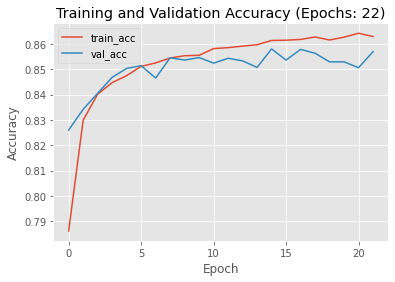

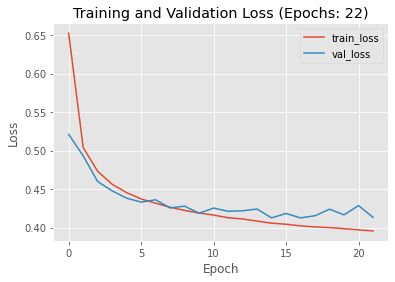

CPU times: user 4min 14s, sys: 43.6 s, total: 4min 58s
Wall time: 3min 59s


In [ ]:
%%time

model_3_3_1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                           tf.keras.layers.Dense(10,activation=tf.nn.softmax)],
                                          name="model_3_3_1_mbgd")
model_3_3_1.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

evaluate_model(model_3_3_1,
               epochs=15000,
               train_tuple=(x_train, ytrain),
               validation_tuple=(x_val, yval),
               test_tuple = (x_test, ytest),
               callbacks=[EarlyStopping(monitor='val_loss',
                                        mode='min',
                                        verbose=1,
                                        patience=5)],
               batch_size=8,
               labels=labels);

Epoch 1/15000
1563/1563 [==============================] - 4s 2ms/step - loss: 1.1453 - accuracy: 0.6355 - val_loss: 0.6477 - val_accuracy: 0.7885
Epoch 2/15000
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6358 - accuracy: 0.7946 - val_loss: 0.5711 - val_accuracy: 0.8095
Epoch 3/15000
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5725 - accuracy: 0.8160 - val_loss: 0.5337 - val_accuracy: 0.8216
Epoch 4/15000
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5332 - accuracy: 0.8226 - val_loss: 0.5138 - val_accuracy: 0.8253
Epoch 5/15000
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5180 - accuracy: 0.8249 - val_loss: 0.4983 - val_accuracy: 0.8326
Epoch 6/15000
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5033 - accuracy: 0.8312 - val_loss: 0.4918 - val_accuracy: 0.8312
Epoch 7/15000
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4890 - accuracy: 0.8357 - val_loss: 0

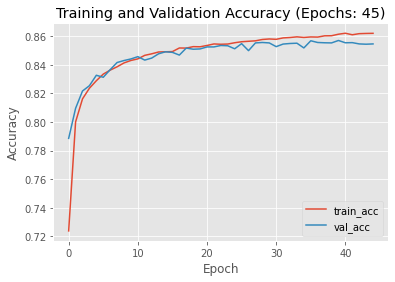

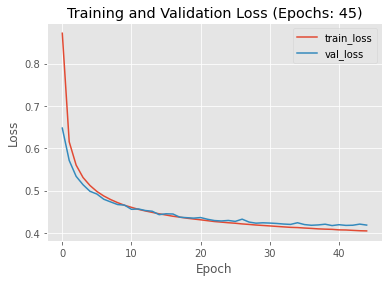

CPU times: user 2min 50s, sys: 27.9 s, total: 3min 18s
Wall time: 2min 36s


In [ ]:
%%time

model_3_3_2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                           tf.keras.layers.Dense(10,activation=tf.nn.softmax)],
                                          name="model_3_3_2_mbgd")
model_3_3_2.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

evaluate_model(model_3_3_2,
               epochs=15000,
               train_tuple=(x_train, ytrain),
               validation_tuple=(x_val, yval),
               test_tuple = (x_test, ytest),
               callbacks=[EarlyStopping(monitor='val_loss',
                                        mode='min',
                                        verbose=1,
                                        patience=5)],
               batch_size=32,
               labels=labels);

Epoch 1/15000
391/391 [==============================] - 4s 4ms/step - loss: 1.5270 - accuracy: 0.5458 - val_loss: 0.8741 - val_accuracy: 0.7345
Epoch 2/15000
391/391 [==============================] - 1s 3ms/step - loss: 0.8450 - accuracy: 0.7343 - val_loss: 0.7402 - val_accuracy: 0.7668
Epoch 3/15000
391/391 [==============================] - 1s 3ms/step - loss: 0.7396 - accuracy: 0.7665 - val_loss: 0.6790 - val_accuracy: 0.7872
Epoch 4/15000
391/391 [==============================] - 1s 3ms/step - loss: 0.6748 - accuracy: 0.7853 - val_loss: 0.6404 - val_accuracy: 0.7979
Epoch 5/15000
391/391 [==============================] - 1s 3ms/step - loss: 0.6467 - accuracy: 0.7927 - val_loss: 0.6143 - val_accuracy: 0.8022
Epoch 6/15000
391/391 [==============================] - 1s 3ms/step - loss: 0.6284 - accuracy: 0.7994 - val_loss: 0.5950 - val_accuracy: 0.8083
Epoch 7/15000
391/391 [==============================] - 1s 3ms/step - loss: 0.5973 - accuracy: 0.8061 - val_loss: 0.5789 - val_ac

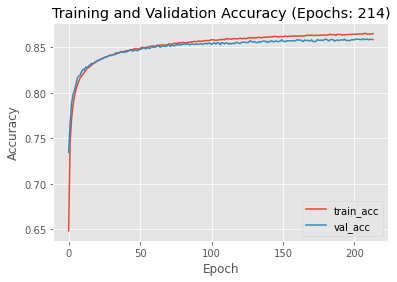

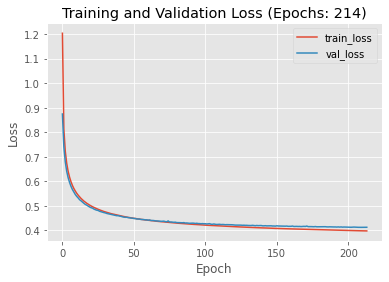

CPU times: user 4min 8s, sys: 37.6 s, total: 4min 46s
Wall time: 3min 55s


In [ ]:
%%time

model_3_3_3 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                           tf.keras.layers.Dense(10,activation=tf.nn.softmax)],
                                          name="model_3_3_3_mbgd")
model_3_3_3.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

evaluate_model(model_3_3_3,
               epochs=15000,
               train_tuple=(x_train, ytrain),
               validation_tuple=(x_val, yval),
               test_tuple = (x_test, ytest),
               callbacks=[EarlyStopping(monitor='val_loss',
                                        mode='min',
                                        verbose=1,
                                        patience=5)],
               batch_size=128,
               labels=labels);

Epoch 1/15000
98/98 [==============================] - 1s 5ms/step - loss: 2.0592 - accuracy: 0.2803 - val_loss: 1.3648 - val_accuracy: 0.6345
Epoch 2/15000
98/98 [==============================] - 0s 4ms/step - loss: 1.2844 - accuracy: 0.6504 - val_loss: 1.0814 - val_accuracy: 0.7058
Epoch 3/15000
98/98 [==============================] - 0s 4ms/step - loss: 1.0596 - accuracy: 0.7021 - val_loss: 0.9539 - val_accuracy: 0.7279
Epoch 4/15000
98/98 [==============================] - 0s 4ms/step - loss: 0.9495 - accuracy: 0.7229 - val_loss: 0.8794 - val_accuracy: 0.7390
Epoch 5/15000
98/98 [==============================] - 0s 4ms/step - loss: 0.8802 - accuracy: 0.7360 - val_loss: 0.8300 - val_accuracy: 0.7507
Epoch 6/15000
98/98 [==============================] - 0s 4ms/step - loss: 0.8364 - accuracy: 0.7442 - val_loss: 0.7930 - val_accuracy: 0.7596
Epoch 7/15000
98/98 [==============================] - 0s 4ms/step - loss: 0.8009 - accuracy: 0.7527 - val_loss: 0.7647 - val_accuracy: 0.7655

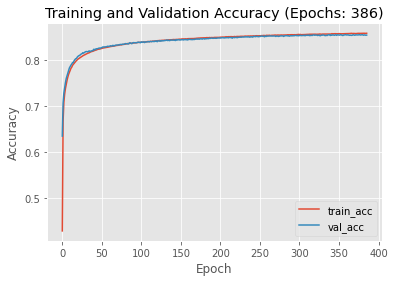

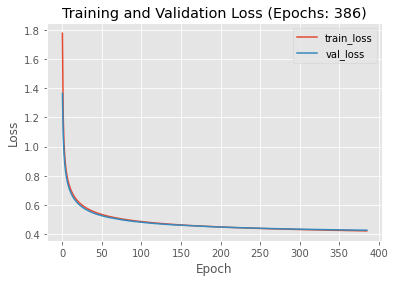

CPU times: user 2min 50s, sys: 21.3 s, total: 3min 11s
Wall time: 2min 37s


In [ ]:
%%time

model_3_3_3 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                           tf.keras.layers.Dense(10,activation=tf.nn.softmax)],
                                          name="model_3_3_3_mbgd")
model_3_3_3.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

evaluate_model(model_3_3_3,
               epochs=15000,
               train_tuple=(x_train, ytrain),
               validation_tuple=(x_val, yval),
               test_tuple = (x_test, ytest),
               callbacks=[EarlyStopping(monitor='val_loss',
                                        mode='min',
                                        verbose=1,
                                        patience=5)],
               batch_size=512,
               labels=labels);

## 4 Anota tus conclusiones con base a los resultados obtenidos

Metric\Batch size|50k - BGD|1-SGD|8-MBGD|32-MBGD|128-MBGD|512-MBGD
:---|:---:|:---:|:---:|:---:|:---:|:---:
Training|0.8452|0.8451|0.8617|0.8631|0.8664|0.8576
Val|0.8438|0.8306|0.8569|0.8545|0.8584|0.8537
Test|0.83|0.82|0.84|0.84|0.84|0.84
Epochs|15000|10|22|45|214|386
Training time (seg)|3012.79|1029.17|296.00|197.04|284.83|190.83

Dados los resultados de cada uno de los experimentos se puede apreciar que tamaños de batch muy grandes incrementa la cantidad de epochs necesarios para poder converger en la mejor solución y por ende, se incrementa el tiempo necesario para entrenarlo.

En general, se consiguieron mejores accuracies en el conjunto de prueba en menor tiempo con un número más chico de batch. En particular, un tamaño de batch igual a 512 obtuvo el mejor resultado en el menor tiempo.

Un batch de tamaño de 32 también resulta una opción atractiva al requerir un menor número de epochs para un tiempo de entrenamiento similar.


# 4

En este ejercicio deberás proponer la mejor red neuronal multicapa (MLP) modificando solamente el número de capas ocultas, el número de neuronas en dichas capas ocultas, el total de épocas y las funciones de activación.

---

Para este ejercicio se usará un batch size de 32 para procurar reducir el número de epochs necesarios para la convergencia, además de que la métrica a monitorear será maximizar el val_accuracy en lugar de minimizar el val_loss con una paciencia de 5.

Se irán probando modelos con una arquitectura más compleja hasta que no se aprecien mejoras notables entre el performance de uno o de otro.

## Model 1

Epoch 1/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9710 - accuracy: 0.7041 - val_loss: 0.5402 - val_accuracy: 0.8194
Epoch 2/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5286 - accuracy: 0.8228 - val_loss: 0.4722 - val_accuracy: 0.8401
Epoch 3/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4766 - accuracy: 0.8378 - val_loss: 0.4554 - val_accuracy: 0.8418
Epoch 4/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4406 - accuracy: 0.8477 - val_loss: 0.4261 - val_accuracy: 0.8525
Epoch 5/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4306 - accuracy: 0.8532 - val_loss: 0.4391 - val_accuracy: 0.8442
Epoch 6/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4080 - accuracy: 0.8599 - val_loss: 0.4040 - val_accuracy: 0.8595
Epoch 7/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3906 - accuracy: 0.8630 - val_loss: 0

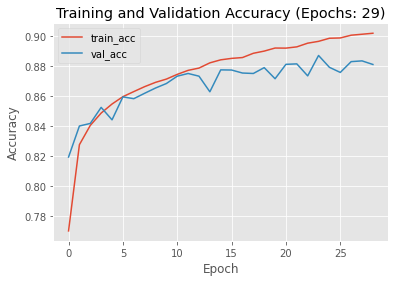

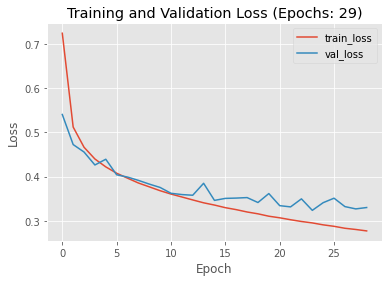

Epoch 1/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5521 - accuracy: 0.5517 - val_loss: 0.8059 - val_accuracy: 0.7454
Epoch 2/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7723 - accuracy: 0.7471 - val_loss: 0.6677 - val_accuracy: 0.7659
Epoch 3/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.6626 - accuracy: 0.7717 - val_loss: 0.6079 - val_accuracy: 0.7855
Epoch 4/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.6092 - accuracy: 0.7877 - val_loss: 0.5806 - val_accuracy: 0.7949
Epoch 5/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5784 - accuracy: 0.7963 - val_loss: 0.5562 - val_accuracy: 0.8056
Epoch 6/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5467 - accuracy: 0.8088 - val_loss: 0.5273 - val_accuracy: 0.8159
Epoch 7/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5298 - accuracy: 0.8154 - val_loss: 0

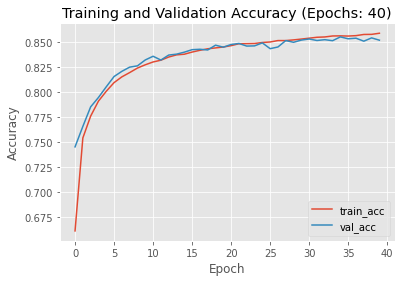

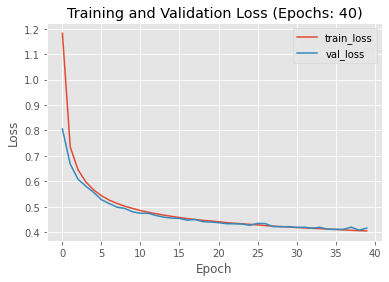

Epoch 1/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9128 - accuracy: 0.7100 - val_loss: 0.5245 - val_accuracy: 0.8213
Epoch 2/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5067 - accuracy: 0.8304 - val_loss: 0.4741 - val_accuracy: 0.8385
Epoch 3/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4684 - accuracy: 0.8385 - val_loss: 0.4540 - val_accuracy: 0.8409
Epoch 4/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4430 - accuracy: 0.8448 - val_loss: 0.4299 - val_accuracy: 0.8472
Epoch 5/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4293 - accuracy: 0.8479 - val_loss: 0.4267 - val_accuracy: 0.8496
Epoch 6/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4227 - accuracy: 0.8526 - val_loss: 0.4214 - val_accuracy: 0.8531
Epoch 7/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4141 - accuracy: 0.8533 - val_loss: 0

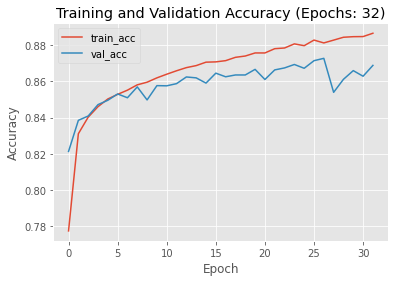

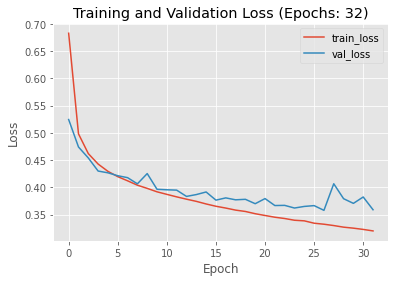

CPU times: user 7min 11s, sys: 1min 13s, total: 8min 25s
Wall time: 6min 58s


In [ ]:
%%time

for act_fun in ["relu", "sigmoid", "tanh"]:

    model_4_1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                            tf.keras.layers.Dense(1024,activation=act_fun),
                                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)],
                                           name=f"model_4_1_{act_fun}")
    model_4_1.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    evaluate_model(model_4_1,
                epochs=15000,
                train_tuple=(x_train, ytrain),
                validation_tuple=(x_val, yval),
                test_tuple = (x_test, ytest),
                callbacks=[EarlyStopping(monitor='val_accuracy',
                                            mode='max',
                                            verbose=1,
                                            patience=5)],
                batch_size=32,
                labels=labels);

## Model 2

Epoch 1/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0235 - accuracy: 0.6844 - val_loss: 0.7250 - val_accuracy: 0.7554
Epoch 2/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4974 - accuracy: 0.8269 - val_loss: 0.4542 - val_accuracy: 0.8390
Epoch 3/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4307 - accuracy: 0.8470 - val_loss: 0.4342 - val_accuracy: 0.8423
Epoch 4/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4095 - accuracy: 0.8559 - val_loss: 0.3890 - val_accuracy: 0.8608
Epoch 5/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3818 - accuracy: 0.8641 - val_loss: 0.3729 - val_accuracy: 0.8633
Epoch 6/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3607 - accuracy: 0.8726 - val_loss: 0.3611 - val_accuracy: 0.8696
Epoch 7/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3408 - accuracy: 0.8774 - val_loss: 0

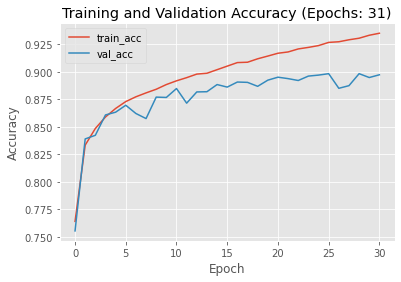

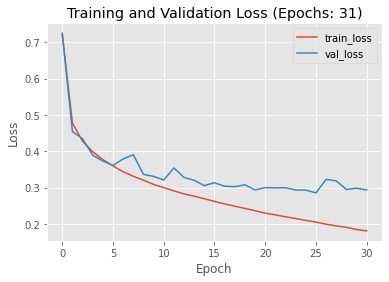

Epoch 1/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3017 - accuracy: 0.1133 - val_loss: 2.2519 - val_accuracy: 0.1123
Epoch 2/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1980 - accuracy: 0.2270 - val_loss: 1.8700 - val_accuracy: 0.3891
Epoch 3/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7238 - accuracy: 0.4074 - val_loss: 1.3720 - val_accuracy: 0.5070
Epoch 4/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2903 - accuracy: 0.5516 - val_loss: 1.0951 - val_accuracy: 0.5986
Epoch 5/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0751 - accuracy: 0.6082 - val_loss: 0.9876 - val_accuracy: 0.6174
Epoch 6/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9700 - accuracy: 0.6335 - val_loss: 0.8962 - val_accuracy: 0.6552
Epoch 7/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8963 - accuracy: 0.6597 - val_loss: 0

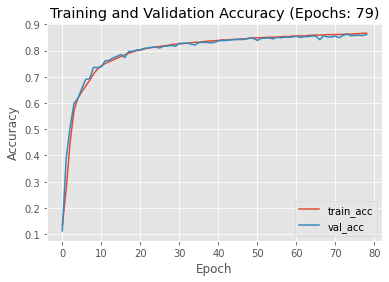

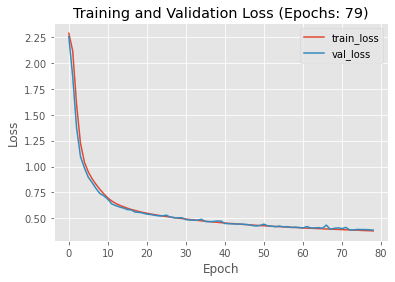

Epoch 1/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8125 - accuracy: 0.7305 - val_loss: 0.4612 - val_accuracy: 0.8347
Epoch 2/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4605 - accuracy: 0.8355 - val_loss: 0.4524 - val_accuracy: 0.8371
Epoch 3/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4209 - accuracy: 0.8506 - val_loss: 0.4303 - val_accuracy: 0.8436
Epoch 4/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4010 - accuracy: 0.8554 - val_loss: 0.4043 - val_accuracy: 0.8535
Epoch 5/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3907 - accuracy: 0.8602 - val_loss: 0.3950 - val_accuracy: 0.8591
Epoch 6/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3766 - accuracy: 0.8648 - val_loss: 0.4071 - val_accuracy: 0.8546
Epoch 7/15000
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3637 - accuracy: 0.8708 - val_loss: 0

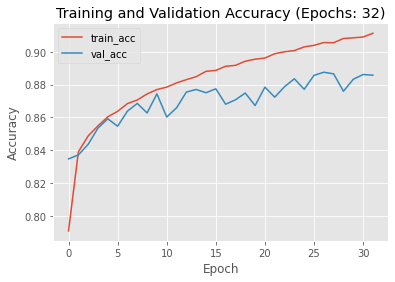

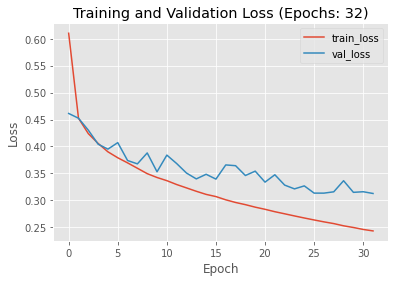

CPU times: user 11min 3s, sys: 1min 44s, total: 12min 48s
Wall time: 10min 48s


In [ ]:
%%time

for act_fun in ["relu", "sigmoid", "tanh"]:

    model_4_1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                            tf.keras.layers.Dense(512,activation=act_fun),
                                            tf.keras.layers.Dense(1024,activation=act_fun),
                                            tf.keras.layers.Dense(512,activation=act_fun),
                                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)],
                                           name=f"model_4_1_{act_fun}")
    model_4_1.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    evaluate_model(model_4_1,
                epochs=15000,
                train_tuple=(x_train, ytrain),
                validation_tuple=(x_val, yval),
                test_tuple = (x_test, ytest),
                callbacks=[EarlyStopping(monitor='val_accuracy',
                                            mode='max',
                                            verbose=1,
                                            patience=5)],
                batch_size=32,
                labels=labels);

## Model 3

Epoch 1/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1565 - accuracy: 0.6139 - val_loss: 0.5620 - val_accuracy: 0.7901
Epoch 2/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5112 - accuracy: 0.8190 - val_loss: 0.4572 - val_accuracy: 0.8334
Epoch 3/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4383 - accuracy: 0.8430 - val_loss: 0.4092 - val_accuracy: 0.8512
Epoch 4/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4050 - accuracy: 0.8560 - val_loss: 0.4217 - val_accuracy: 0.8445
Epoch 5/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3691 - accuracy: 0.8679 - val_loss: 0.3856 - val_accuracy: 0.8560
Epoch 6/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3577 - accuracy: 0.8704 - val_loss: 0.3504 - val_accuracy: 0.8717
Epoch 7/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3324 - accuracy: 0.8788 - val_loss: 0

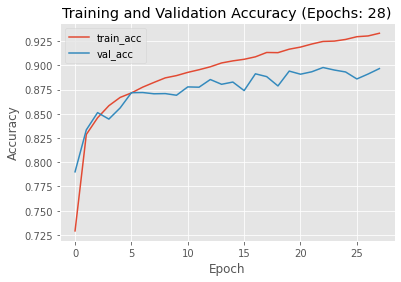

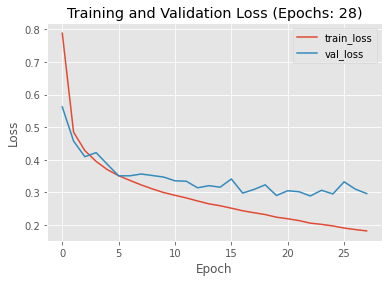

Epoch 1/15000
1563/1563 [==============================] - 6s 3ms/step - loss: 2.3305 - accuracy: 0.1006 - val_loss: 2.3178 - val_accuracy: 0.1056
Epoch 2/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3257 - accuracy: 0.1012 - val_loss: 2.3249 - val_accuracy: 0.1005
Epoch 3/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3229 - accuracy: 0.1007 - val_loss: 2.3212 - val_accuracy: 0.1005
Epoch 4/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3185 - accuracy: 0.1020 - val_loss: 2.3363 - val_accuracy: 0.1056
Epoch 5/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3161 - accuracy: 0.1035 - val_loss: 2.3119 - val_accuracy: 0.1056
Epoch 6/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3146 - accuracy: 0.1000 - val_loss: 2.3064 - val_accuracy: 0.0988
Epoch 00006: early stopping


 ********* Training time: 35.28098319799983 s.


*****************
* Model Summary *
***

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




*************************
* Classification Report *
*************************
              precision    recall  f1-score   support

     T_shirt       0.00      0.00      0.00      1000
     Trouser       0.00      0.00      0.00      1000
    Pullover       0.00      0.00      0.00      1000
       Dress       0.00      0.00      0.00      1000
        Coat       0.00      0.00      0.00      1000
      Sandal       0.00      0.00      0.00      1000
       Shirt       0.00      0.00      0.00      1000
     Sneaker       0.00      0.00      0.00      1000
         Bag       0.10      1.00      0.18      1000
  Ankle_boot       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



********************
* Confusion Matrix *
********************
[[   0    0    0    0    0    0    0    0 1000    0]
 [   0    0    0    0    0    0    0    0 1

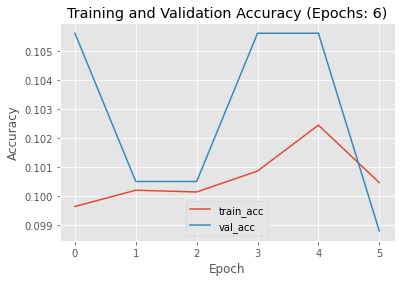

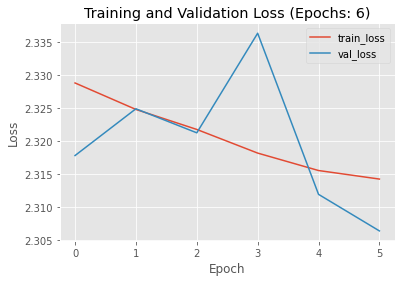

Epoch 1/15000
1563/1563 [==============================] - 6s 3ms/step - loss: 0.7594 - accuracy: 0.7427 - val_loss: 0.4914 - val_accuracy: 0.8167
Epoch 2/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4557 - accuracy: 0.8383 - val_loss: 0.4501 - val_accuracy: 0.8387
Epoch 3/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4295 - accuracy: 0.8467 - val_loss: 0.4481 - val_accuracy: 0.8355
Epoch 4/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4035 - accuracy: 0.8526 - val_loss: 0.4067 - val_accuracy: 0.8537
Epoch 5/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3891 - accuracy: 0.8603 - val_loss: 0.3916 - val_accuracy: 0.8572
Epoch 6/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3726 - accuracy: 0.8651 - val_loss: 0.3987 - val_accuracy: 0.8546
Epoch 7/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3620 - accuracy: 0.8681 - val_loss: 0

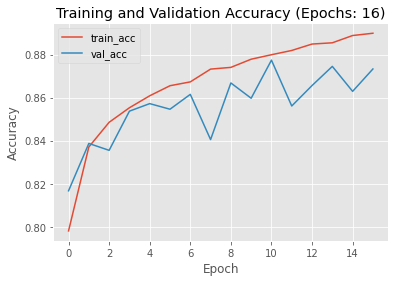

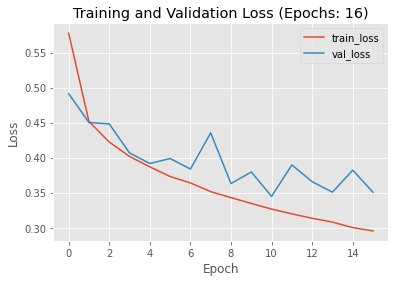

CPU times: user 4min 12s, sys: 42.9 s, total: 4min 55s
Wall time: 4min 9s


In [ ]:
%%time

for act_fun in ["relu", "sigmoid", "tanh"]:

    model_4_1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                            tf.keras.layers.Dense(256,activation=act_fun),
                                            tf.keras.layers.Dense(512,activation=act_fun),
                                            tf.keras.layers.Dense(1024,activation=act_fun),
                                            tf.keras.layers.Dense(2048,activation=act_fun),
                                            tf.keras.layers.Dense(1024,activation=act_fun),
                                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)],
                                           name=f"model_4_1_{act_fun}")
    model_4_1.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    evaluate_model(model_4_1,
                epochs=15000,
                train_tuple=(x_train, ytrain),
                validation_tuple=(x_val, yval),
                test_tuple = (x_test, ytest),
                callbacks=[EarlyStopping(monitor='val_accuracy',
                                            mode='max',
                                            verbose=1,
                                            patience=5)],
                batch_size=32,
                labels=labels);

## Observaciones

De las tres arquitecturas propuestas se encontraron buenos resultados, en particular, 2 arquitecturas obtuvieron 0.90 de accuracy en Validation y 0.89 en Test,
sin embargo, usando la navaja de Ockham, el mejor modelo es el mas sencillo que tiene 4 capas en total. Se tardo 168.52 segundos en entrenar durante 31 epochs
y que usa ReLU como su principal función de activación.

La mejor arquitectura fue la siguiente:

Layer (type)         |        Output Shape       |       Param #   
:---:|:---:|:---:
flatten_10 (Flatten) |        (None, 784)         |      0         
dense_38 (Dense)     |        (None, 512)         |      401920    
dense_39 (Dense)     |        (None, 1024)        |      525312    
dense_40 (Dense)     |        (None, 512)         |      524800    
dense_41 (Dense)     |        (None, 10)          |      5130      
Total params: 1,457,162|
Trainable params: 1,457,162|
Non-trainable params: 0|

Cabe mencionar que en el modelo más complejo se encontró que con la función sigmoide se obtuvieron muy malos resultados que provocaron un EarlyStopping casi
inmediatamente.

A mayor complejidad de la arquitectura, no se lograron apreciar resultados mucho mejores. El mejor modelo presentó algo de varianza, pero se puede apreciar
que el modelo está generalizando de manera apropiada a valores nunca antes vistos.

1. ¿Cuántas capas ocultas estás encontrando en tu mejor modelo?
    * 3 capas ocultas
1. ¿Cuántas neuronas en la capa o capas ocultas tiene tu mejor modelo?
    * 512 + 1024 + 512 = 2048 neuronas en 3 capas ocultas
1. ¿Cuántos parámetros (pesos) tiene tu mejor modelo?
    * Total params: 1,457,162
    * Trainable params: 1,457,162
    * Non-trainable params: 0
1. ¿Cuál es el mejor valor para el número de épocas en tu mejor modelo?
    * 31 epochs
1. ¿Cuáles son las funciones de activación de tu mejor modelo?
    * ReLU
1. ¿Cuáles son los valores del accuracy de los conjuntos de Train, Validación y Test de tu mejor modelo de este caso?

&nbsp;|ReLU-31 epochs
:---|---:
Train|0.94
Val|0.90
Test|0.89


# 5

En este inciso deberás aplicar alguno de los criterios de regularización: Dropout, l1, l2 o l1_l2. En caso de usar alguno de estos criterios, deberás determinar el valor de la constante de penalización para l1, l2, l1_l2, o de la constante “rate” de Dropout o tasa de apagado de conexiones entre nodos de una capa a otra. Igualmente determina los mejores valores para el número de capas ocultas, neuronas, funciones de activación y épocas.

---

Se utilizará la mejor arquitectura encontrada en el punto anterior y se usarán valores como valores de regularización `[0.001, 0.003, 0.009]` que nos permitirá ir aumentando paulatinamente el impacto del valor de regularización. Los valores fueron seleccionados con base a sugerencias hechas por Andrew Ng.

Para el Dropout se usarán valores de `[0.2, 0.3, 0.4, 0.5]` previo a la capa de salida. Esto es conforme a las sugerencias vistas en clase.

Se buscarán 2 cosas en este experimento:

1. Que el accuracy sea similar al del inciso anterior.
1. Que el efecto de la varianza se vea reducido sin que esto aumente mucho el sesgo (bias).

Si no se consiguen estos puntos, no tendría mucho caso considerar usar regularización o Dropout en el modelo obtenido en el inciso anterior.



## L1 and L2



****************************************************************************************************
* *************** Reg: <class 'tensorflow.python.keras.regularizers.L1'>: 0.001 ****************** *
****************************************************************************************************
Epoch 1/15000
1563/1563 [==============================] - 6s 3ms/step - loss: 1.3644 - accuracy: 0.6884 - val_loss: 0.7393 - val_accuracy: 0.8306
Epoch 2/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7072 - accuracy: 0.8334 - val_loss: 0.6114 - val_accuracy: 0.8455
Epoch 3/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5949 - accuracy: 0.8521 - val_loss: 0.5495 - val_accuracy: 0.8575
Epoch 4/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5411 - accuracy: 0.8610 - val_loss: 0.5347 - val_accuracy: 0.8541
Epoch 5/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4981 - accuracy: 0.8717 - 

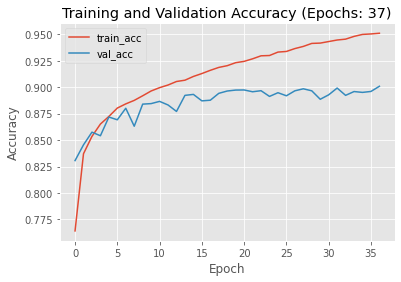

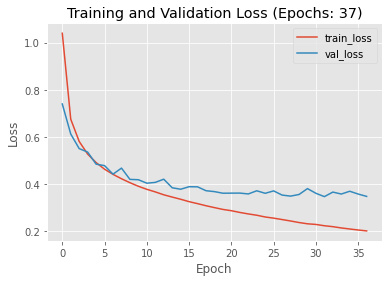



****************************************************************************************************
* *************** Reg: <class 'tensorflow.python.keras.regularizers.L1'>: 0.003 ****************** *
****************************************************************************************************
Epoch 1/15000
1563/1563 [==============================] - 6s 3ms/step - loss: 1.7412 - accuracy: 0.6557 - val_loss: 0.9541 - val_accuracy: 0.8107
Epoch 2/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9020 - accuracy: 0.8157 - val_loss: 0.7695 - val_accuracy: 0.8356
Epoch 3/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7380 - accuracy: 0.8439 - val_loss: 0.6758 - val_accuracy: 0.8536
Epoch 4/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6526 - accuracy: 0.8595 - val_loss: 0.6310 - val_accuracy: 0.8526
Epoch 5/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5998 - accuracy: 0.8673 - 

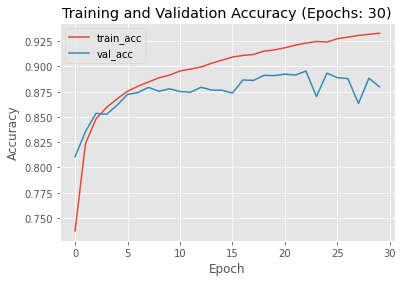

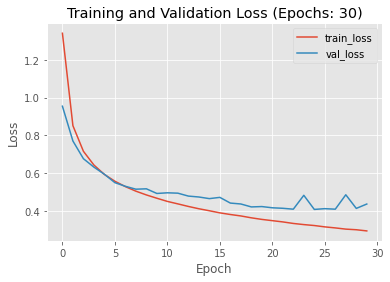



****************************************************************************************************
* *************** Reg: <class 'tensorflow.python.keras.regularizers.L1'>: 0.009 ****************** *
****************************************************************************************************
Epoch 1/15000
1563/1563 [==============================] - 6s 3ms/step - loss: 2.4889 - accuracy: 0.4036 - val_loss: 1.8265 - val_accuracy: 0.4492
Epoch 2/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7316 - accuracy: 0.4878 - val_loss: 1.4947 - val_accuracy: 0.5509
Epoch 3/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4391 - accuracy: 0.5638 - val_loss: 1.3223 - val_accuracy: 0.5855
Epoch 4/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2952 - accuracy: 0.6109 - val_loss: 1.2089 - val_accuracy: 0.6576
Epoch 5/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1716 - accuracy: 0.6585 - 

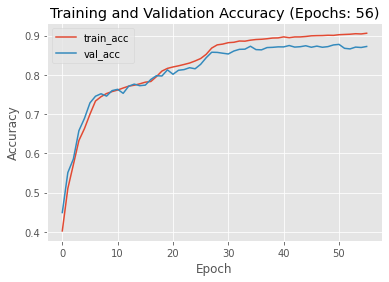

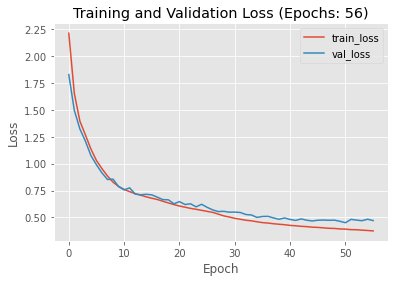



****************************************************************************************************
* *************** Reg: <class 'tensorflow.python.keras.regularizers.L2'>: 0.001 ****************** *
****************************************************************************************************
Epoch 1/15000
1563/1563 [==============================] - 6s 3ms/step - loss: 1.2203 - accuracy: 0.6839 - val_loss: 0.6156 - val_accuracy: 0.8310
Epoch 2/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5881 - accuracy: 0.8342 - val_loss: 0.5065 - val_accuracy: 0.8534
Epoch 3/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4904 - accuracy: 0.8564 - val_loss: 0.4612 - val_accuracy: 0.8603
Epoch 4/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4473 - accuracy: 0.8681 - val_loss: 0.4480 - val_accuracy: 0.8611
Epoch 5/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4166 - accuracy: 0.8734 - 

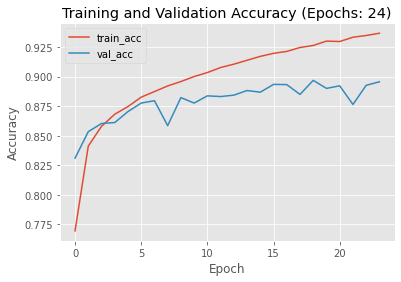

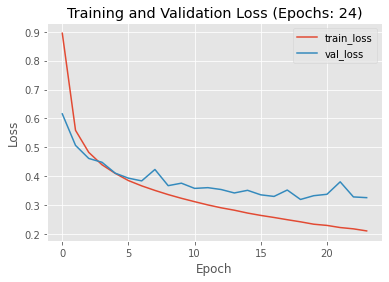



****************************************************************************************************
* *************** Reg: <class 'tensorflow.python.keras.regularizers.L2'>: 0.003 ****************** *
****************************************************************************************************
Epoch 1/15000
1563/1563 [==============================] - 6s 3ms/step - loss: 1.4127 - accuracy: 0.6754 - val_loss: 0.7124 - val_accuracy: 0.8231
Epoch 2/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6610 - accuracy: 0.8367 - val_loss: 0.5703 - val_accuracy: 0.8479
Epoch 3/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5481 - accuracy: 0.8550 - val_loss: 0.5032 - val_accuracy: 0.8626
Epoch 4/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4851 - accuracy: 0.8673 - val_loss: 0.4685 - val_accuracy: 0.8673
Epoch 5/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4543 - accuracy: 0.8740 - 

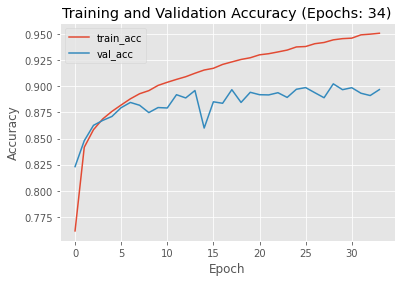

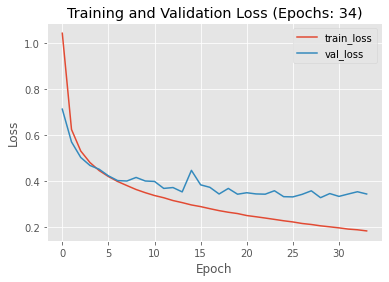



****************************************************************************************************
* *************** Reg: <class 'tensorflow.python.keras.regularizers.L2'>: 0.009 ****************** *
****************************************************************************************************
Epoch 1/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7056 - accuracy: 0.6455 - val_loss: 0.8655 - val_accuracy: 0.8134
Epoch 2/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8052 - accuracy: 0.8239 - val_loss: 0.6674 - val_accuracy: 0.8475
Epoch 3/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6487 - accuracy: 0.8475 - val_loss: 0.5971 - val_accuracy: 0.8583
Epoch 4/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5700 - accuracy: 0.8641 - val_loss: 0.5402 - val_accuracy: 0.8677
Epoch 5/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5263 - accuracy: 0.8722 - 

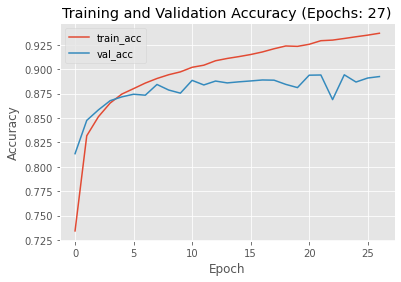

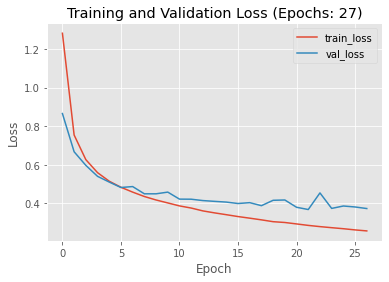

In [ ]:
for regularizer in [regularizers.l1, regularizers.l2]:

    for reg_val in [0.001, 0.003, 0.009]:

        print_marquee(f"*************** Reg: {regularizer}: {reg_val} ******************")

        reg = regularizer(reg_val)

        model_5_1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                                    tf.keras.layers.Dense(512,activation="relu", activity_regularizer=reg),
                                                    tf.keras.layers.Dense(1024,activation="relu", activity_regularizer=reg),
                                                    tf.keras.layers.Dense(512,activation="relu", activity_regularizer=reg),
                                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)],
                                                name=f"model_5_1_relu")
        model_5_1.compile(optimizer='sgd', 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

        evaluate_model(model_5_1,
                    epochs=15000,
                    train_tuple=(x_train, ytrain),
                    validation_tuple=(x_val, yval),
                    test_tuple = (x_test, ytest),
                    callbacks=[EarlyStopping(monitor='val_loss',
                                                mode='min',
                                                verbose=1,
                                                patience=5)],
                    batch_size=32,
                    labels=labels);

## L1L2



*******************************************************
* *************** L1L2 0.001/0.001 ****************** *
*******************************************************
Epoch 1/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4450 - accuracy: 0.6833 - val_loss: 0.7725 - val_accuracy: 0.8248
Epoch 2/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7327 - accuracy: 0.8314 - val_loss: 0.6348 - val_accuracy: 0.8449
Epoch 3/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6083 - accuracy: 0.8524 - val_loss: 0.5730 - val_accuracy: 0.8548
Epoch 4/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5480 - accuracy: 0.8650 - val_loss: 0.5176 - val_accuracy: 0.8651
Epoch 5/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5083 - accuracy: 0.8708 - val_loss: 0.4975 - val_accuracy: 0.8710
Epoch 6/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4737 - accurac

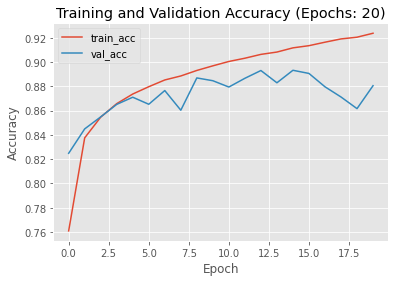

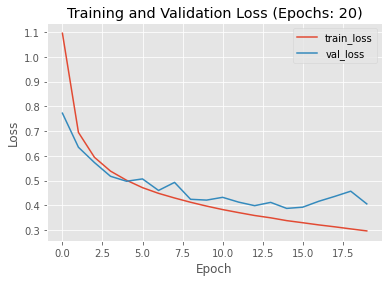



*******************************************************
* *************** L1L2 0.001/0.003 ****************** *
*******************************************************
Epoch 1/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5797 - accuracy: 0.6666 - val_loss: 0.8244 - val_accuracy: 0.8202
Epoch 2/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7779 - accuracy: 0.8262 - val_loss: 0.6576 - val_accuracy: 0.8459
Epoch 3/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6392 - accuracy: 0.8505 - val_loss: 0.5855 - val_accuracy: 0.8606
Epoch 4/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5783 - accuracy: 0.8611 - val_loss: 0.5403 - val_accuracy: 0.8672
Epoch 5/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5282 - accuracy: 0.8724 - val_loss: 0.5094 - val_accuracy: 0.8718
Epoch 6/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4973 - accurac

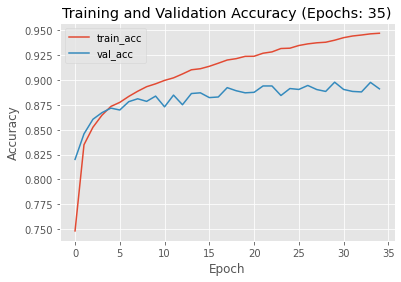

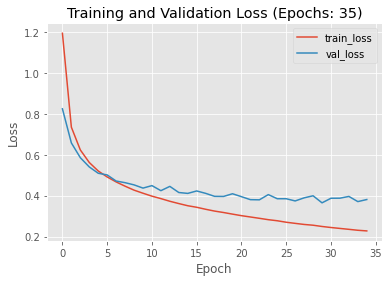



*******************************************************
* *************** L1L2 0.001/0.009 ****************** *
*******************************************************
Epoch 1/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8440 - accuracy: 0.6382 - val_loss: 0.9823 - val_accuracy: 0.7961
Epoch 2/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9150 - accuracy: 0.8100 - val_loss: 0.7721 - val_accuracy: 0.8289
Epoch 3/15000
1563/1563 [==============================] - 5s 4ms/step - loss: 0.7325 - accuracy: 0.8435 - val_loss: 0.7002 - val_accuracy: 0.8380
Epoch 4/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6406 - accuracy: 0.8571 - val_loss: 0.6738 - val_accuracy: 0.8354
Epoch 5/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5881 - accuracy: 0.8676 - val_loss: 0.5825 - val_accuracy: 0.8652
Epoch 6/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5449 - accurac

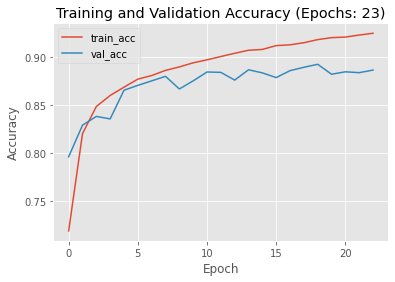

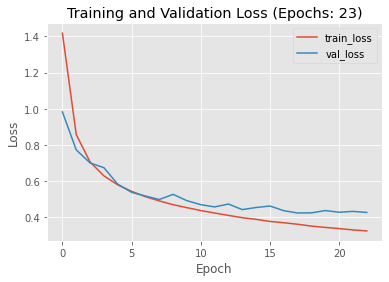



*******************************************************
* *************** L1L2 0.003/0.001 ****************** *
*******************************************************
Epoch 1/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7893 - accuracy: 0.6622 - val_loss: 0.9795 - val_accuracy: 0.8092
Epoch 2/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9218 - accuracy: 0.8171 - val_loss: 0.7768 - val_accuracy: 0.8389
Epoch 3/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7543 - accuracy: 0.8432 - val_loss: 0.6790 - val_accuracy: 0.8592
Epoch 4/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6701 - accuracy: 0.8560 - val_loss: 0.6214 - val_accuracy: 0.8644
Epoch 5/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6091 - accuracy: 0.8708 - val_loss: 0.5877 - val_accuracy: 0.8673
Epoch 6/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5701 - accurac

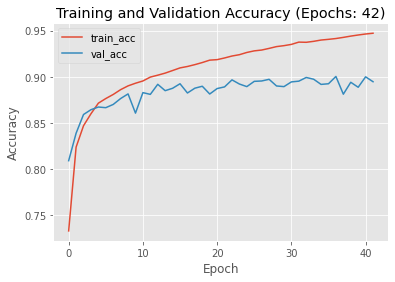

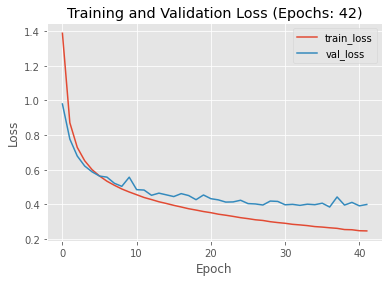



*******************************************************
* *************** L1L2 0.003/0.003 ****************** *
*******************************************************
Epoch 1/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9017 - accuracy: 0.6398 - val_loss: 1.0276 - val_accuracy: 0.7919
Epoch 2/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9549 - accuracy: 0.8111 - val_loss: 0.8063 - val_accuracy: 0.8352
Epoch 3/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7694 - accuracy: 0.8472 - val_loss: 0.6998 - val_accuracy: 0.8526
Epoch 4/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6807 - accuracy: 0.8573 - val_loss: 0.6469 - val_accuracy: 0.8590
Epoch 5/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6271 - accuracy: 0.8660 - val_loss: 0.6121 - val_accuracy: 0.8632
Epoch 6/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5904 - accurac

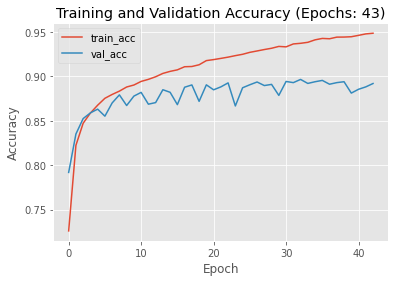

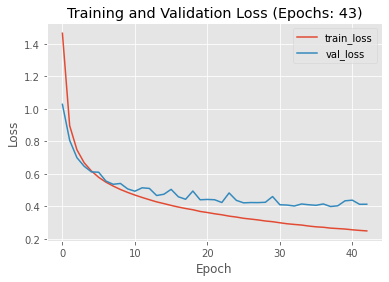



*******************************************************
* *************** L1L2 0.003/0.009 ****************** *
*******************************************************
Epoch 1/15000
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0763 - accuracy: 0.6143 - val_loss: 1.1356 - val_accuracy: 0.7836
Epoch 2/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0651 - accuracy: 0.7879 - val_loss: 0.8910 - val_accuracy: 0.8261
Epoch 3/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8509 - accuracy: 0.8291 - val_loss: 0.7858 - val_accuracy: 0.8392
Epoch 4/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7441 - accuracy: 0.8494 - val_loss: 0.7101 - val_accuracy: 0.8504
Epoch 5/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6737 - accuracy: 0.8620 - val_loss: 0.6641 - val_accuracy: 0.8558
Epoch 6/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6318 - accurac

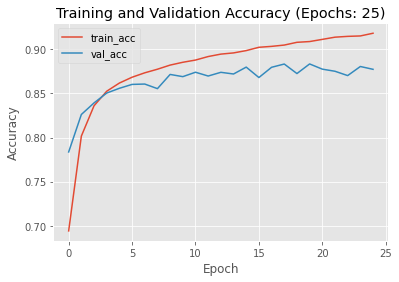

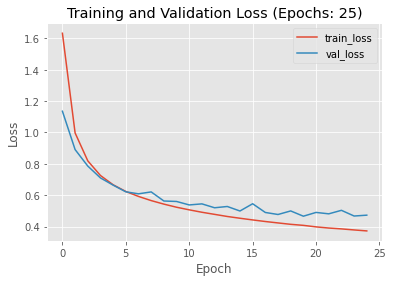



*******************************************************
* *************** L1L2 0.009/0.001 ****************** *
*******************************************************
Epoch 1/15000
1563/1563 [==============================] - 7s 4ms/step - loss: 2.5042 - accuracy: 0.2946 - val_loss: 2.0920 - val_accuracy: 0.3076
Epoch 2/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9847 - accuracy: 0.3258 - val_loss: 1.7967 - val_accuracy: 0.3772
Epoch 3/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7471 - accuracy: 0.3940 - val_loss: 1.6749 - val_accuracy: 0.4645
Epoch 4/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5995 - accuracy: 0.4901 - val_loss: 1.4583 - val_accuracy: 0.4921
Epoch 5/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4303 - accuracy: 0.5223 - val_loss: 1.3894 - val_accuracy: 0.5385
Epoch 6/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3384 - accurac

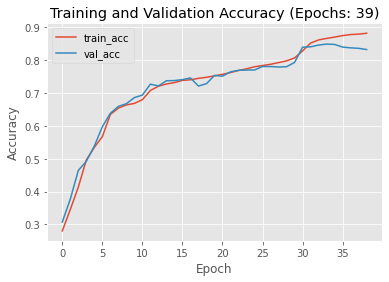

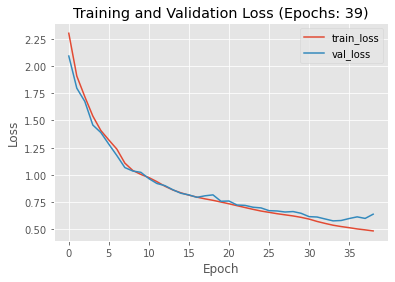



*******************************************************
* *************** L1L2 0.009/0.003 ****************** *
*******************************************************
Epoch 1/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 2.4841 - accuracy: 0.4001 - val_loss: 1.8514 - val_accuracy: 0.4369
Epoch 2/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7650 - accuracy: 0.4556 - val_loss: 1.5660 - val_accuracy: 0.5173
Epoch 3/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5286 - accuracy: 0.5322 - val_loss: 1.4288 - val_accuracy: 0.5869
Epoch 4/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3880 - accuracy: 0.6072 - val_loss: 1.2572 - val_accuracy: 0.6530
Epoch 5/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2008 - accuracy: 0.6551 - val_loss: 1.1061 - val_accuracy: 0.6736
Epoch 6/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0762 - accurac

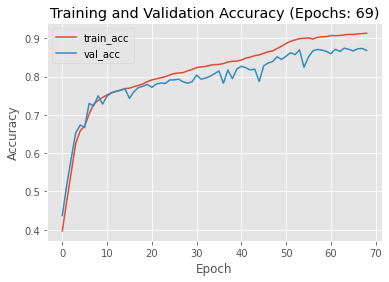

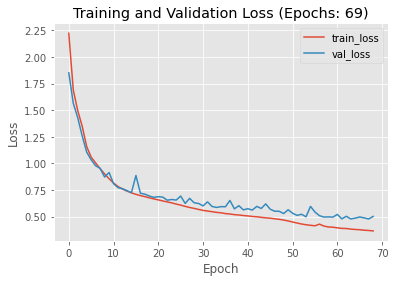



*******************************************************
* *************** L1L2 0.009/0.009 ****************** *
*******************************************************
Epoch 1/15000
1563/1563 [==============================] - 7s 4ms/step - loss: 2.5155 - accuracy: 0.2449 - val_loss: 2.2927 - val_accuracy: 0.2490
Epoch 2/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2316 - accuracy: 0.2569 - val_loss: 2.0737 - val_accuracy: 0.2850
Epoch 3/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0098 - accuracy: 0.3131 - val_loss: 1.8562 - val_accuracy: 0.3530
Epoch 4/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7956 - accuracy: 0.3799 - val_loss: 1.7056 - val_accuracy: 0.3706
Epoch 5/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6754 - accuracy: 0.3911 - val_loss: 1.6496 - val_accuracy: 0.3997
Epoch 6/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6276 - accurac

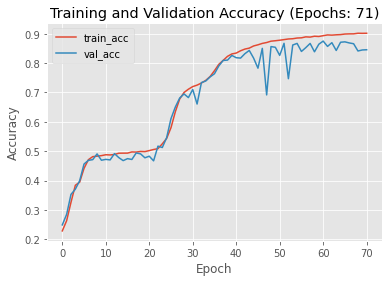

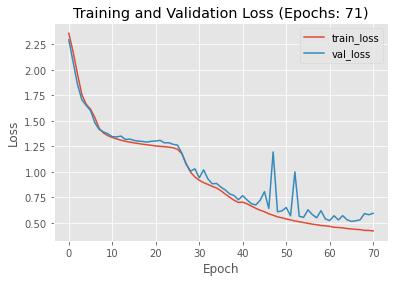

CPU times: user 41min 29s, sys: 5min 45s, total: 47min 14s
Wall time: 35min 48s


In [ ]:
%%time

reg_values = [0.001, 0.003, 0.009]

for l1_val in reg_values:

    for l2_val in reg_values:

        reg = regularizers.l1_l2(l1_val, l2_val)

        print_marquee(f"*************** L1L2 {l1_val}/{l2_val} ******************")

        model_5_2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                                    tf.keras.layers.Dense(512,activation="relu", activity_regularizer=reg),
                                                    tf.keras.layers.Dense(1024,activation="relu", activity_regularizer=reg),
                                                    tf.keras.layers.Dense(512,activation="relu", activity_regularizer=reg),
                                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)],
                                                name=f"model_5_2_relu")
        model_5_2.compile(optimizer='sgd', 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

        evaluate_model(model_5_2,
                    epochs=15000,
                    train_tuple=(x_train, ytrain),
                    validation_tuple=(x_val, yval),
                    test_tuple = (x_test, ytest),
                    callbacks=[EarlyStopping(monitor='val_loss',
                                                mode='min',
                                                verbose=1,
                                                patience=5)],
                    batch_size=32,
                    labels=labels);



## Dropout



***************************************************
* *************** Dropout: 0.2 ****************** *
***************************************************
Epoch 1/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5079 - accuracy: 0.2699 - val_loss: 2.2065 - val_accuracy: 0.2337
Epoch 2/15000
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1462 - accuracy: 0.2572 - val_loss: 1.9619 - val_accuracy: 0.2986
Epoch 3/15000
1563/1563 [==============================] - 5s 4ms/step - loss: 1.8873 - accuracy: 0.3617 - val_loss: 1.7523 - val_accuracy: 0.3757
Epoch 4/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7208 - accuracy: 0.3963 - val_loss: 1.6678 - val_accuracy: 0.4423
Epoch 5/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6298 - accuracy: 0.4572 - val_loss: 1.5584 - val_accuracy: 0.4414
Epoch 6/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5094 - accuracy: 0.4738 - 

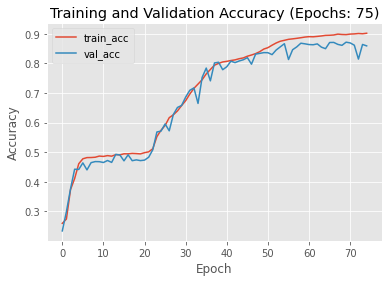

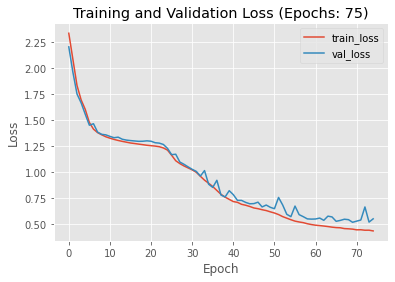



***************************************************
* *************** Dropout: 0.3 ****************** *
***************************************************
Epoch 1/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5278 - accuracy: 0.2406 - val_loss: 2.3028 - val_accuracy: 0.1832
Epoch 2/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2929 - accuracy: 0.1939 - val_loss: 2.1845 - val_accuracy: 0.2116
Epoch 3/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1067 - accuracy: 0.2879 - val_loss: 1.9195 - val_accuracy: 0.3312
Epoch 4/15000
1563/1563 [==============================] - 5s 4ms/step - loss: 1.8524 - accuracy: 0.3638 - val_loss: 1.7362 - val_accuracy: 0.3739
Epoch 5/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7086 - accuracy: 0.3844 - val_loss: 1.6642 - val_accuracy: 0.3830
Epoch 6/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6444 - accuracy: 0.3965 - 

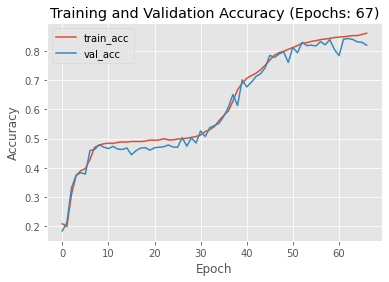

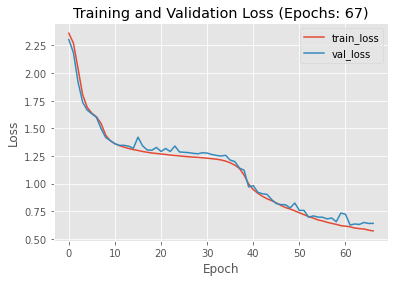



***************************************************
* *************** Dropout: 0.4 ****************** *
***************************************************
Epoch 1/15000
1563/1563 [==============================] - 7s 4ms/step - loss: 2.5210 - accuracy: 0.2528 - val_loss: 2.3013 - val_accuracy: 0.1642
Epoch 2/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2906 - accuracy: 0.1864 - val_loss: 2.2110 - val_accuracy: 0.1977
Epoch 3/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1636 - accuracy: 0.2354 - val_loss: 2.0217 - val_accuracy: 0.3103
Epoch 4/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9573 - accuracy: 0.3305 - val_loss: 1.8045 - val_accuracy: 0.3629
Epoch 5/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7663 - accuracy: 0.3820 - val_loss: 1.6996 - val_accuracy: 0.3764
Epoch 6/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6744 - accuracy: 0.4046 - 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




*************************
* Classification Report *
*************************
              precision    recall  f1-score   support

     T_shirt       0.00      0.00      0.00      1000
     Trouser       0.00      0.00      0.00      1000
    Pullover       0.00      0.00      0.00      1000
       Dress       0.75      0.08      0.14      1000
        Coat       0.17      0.85      0.28      1000
      Sandal       0.98      0.95      0.96      1000
       Shirt       0.27      0.18      0.22      1000
     Sneaker       0.94      0.93      0.93      1000
         Bag       0.88      0.98      0.92      1000
  Ankle_boot       0.93      0.97      0.95      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.44     10000
weighted avg       0.49      0.49      0.44     10000



********************
* Confusion Matrix *
********************
[[  0   0   0   3 862   2 110   0  23   0]
 [  0   0   0  15 972   0   9   0   4   0]
 [  0   0 

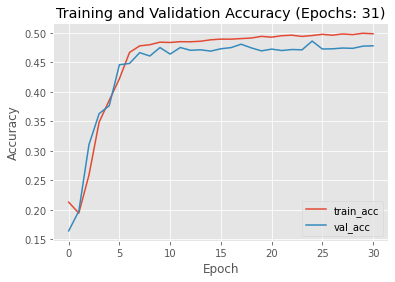

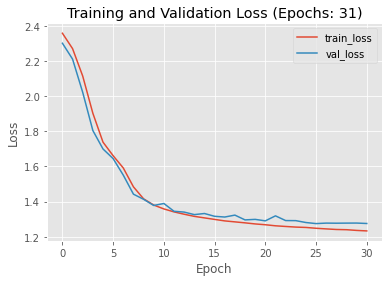



***************************************************
* *************** Dropout: 0.5 ****************** *
***************************************************
Epoch 1/15000
1563/1563 [==============================] - 7s 4ms/step - loss: 2.5045 - accuracy: 0.2311 - val_loss: 2.2972 - val_accuracy: 0.1812
Epoch 2/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2739 - accuracy: 0.2025 - val_loss: 2.1731 - val_accuracy: 0.2013
Epoch 3/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1242 - accuracy: 0.2308 - val_loss: 1.9916 - val_accuracy: 0.2999
Epoch 4/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9320 - accuracy: 0.3339 - val_loss: 1.7951 - val_accuracy: 0.3631
Epoch 5/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7599 - accuracy: 0.3788 - val_loss: 1.7029 - val_accuracy: 0.3663
Epoch 6/15000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6745 - accuracy: 0.3899 - 

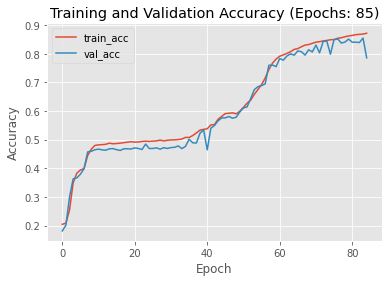

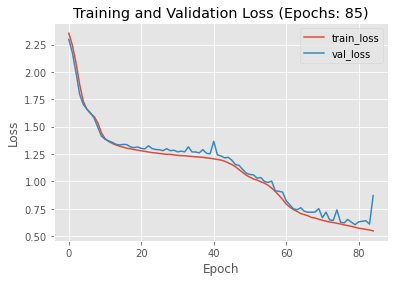

CPU times: user 29min 44s, sys: 4min 14s, total: 33min 58s
Wall time: 24min 38s


In [ ]:
%%time

for dropout_val in [0.2, 0.3, 0.4, 0.5]:

    print_marquee(f"*************** Dropout: {dropout_val} ******************")

    model_5_2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                                tf.keras.layers.Dense(512,activation="relu", activity_regularizer=reg),
                                                tf.keras.layers.Dense(1024,activation="relu", activity_regularizer=reg),
                                                tf.keras.layers.Dense(512,activation="relu", activity_regularizer=reg),
                                                tf.keras.layers.Dropout(dropout_val),
                                                tf.keras.layers.Dense(10, activation=tf.nn.softmax)],
                                            name=f"model_5_3_relu")
    model_5_2.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    evaluate_model(model_5_2,
                epochs=15000,
                train_tuple=(x_train, ytrain),
                validation_tuple=(x_val, yval),
                test_tuple = (x_test, ytest),
                callbacks=[EarlyStopping(monitor='val_loss',
                                            mode='min',
                                            verbose=1,
                                            patience=5)],
                batch_size=32,
                labels=labels);

## Observaciones

### Regularización

Se aprecia una ligera reducción en la varianza, pero con un tiempo de entrenamiento mayor.

### Dropout

La varianza se vio reducida, aunque hay brincos en las lineas de validación, el accuracy se vió reducido también debido a que el bias aumentó. Esto se explica con el bias-variance tradeoff, en donde al reducir una de estas métricas, la otra se debe incrementar.

Con un Dropout de 0.4 se redujo tanto el accuracy que el modelo no se comporta mejor que un volado. Curiosamente, con un Dropout de 0.5 esto no sucedió aunque se consiguieron los accuracies más
bajos de todos los modelos. Muy probablemente con el Dropout = 0.4 la inicialización aleatoria de pesos jugó un papel perjudicial.


---

1. ¿Cuál es el mejor criterio de regularización (l1,l2 o l1_l2) y su constante de penalización encontrado? Si no lo utilizas, justificar tal decisión.
    * Para L1 = 0.001
    * Para L2 = 0.001 y 0.003
    * Para L1L2 = 0.001/0.009
    * El hecho de que los modelos sin regularización tienen un rendimiento en test similar a los de validación
hace pensar que el modelo está generalizando de manera apropiada a datos nunca antes vistos así que un overfitting no es un problema en ellos. Debido a esto, no se aprecia mucho caso en agregar regularización.
    * Dicho lo anterior, la regularización con L2 = 0.001 fue el que mejor se comportó en este experimento ya que necesitó menos epochs y menor tiempo de entrenamiento con un alto nivel de accuracy.
1. ¿Cuál es el mejor valor de la constante “rate” de Dropout encontrado? Si no lo utilizas, justificar tal decisión.
    * El mejor modelo con Dropout fue con un valor de 0.2, pero dado que el accuracy se vió reducido en comparación con no usar Dropout, se aprecia que Dropout no tiene un efecto positivo en el modelo y sería mejor no utilizarlo.
1. ¿Cuántas capas ocultas y neuronas tiene tu mejor modelo?
    * 512 + 1024 + 512 = 2048 neuronas en 3 capas ocultas
1. ¿Cuántos parámetros (pesos) tiene tu mejor modelo?
    * Total params: 1,457,162
    * Trainable params: 1,457,162
    * Non-trainable params: 0
1. Indica las funciones de activación y épocas utilizadas en tu mejor modelo.
    * Se utilizó ReLU en las capas densas y softmax en la capa de salida con 24 épocas, sin Dropout y con L2 = 0.001
1. ¿Cuáles son los valores del accuracy de los conjuntos de Train, Validación y Test de tu mejor modelo de este caso? 

&nbsp;|Value
:---|---:
Train Acc.|0.94
Val Acc.|0.90
Test Acc.|0.89
Regularizer|L2=0.001
Dropout|No
Epochs|24
Time|158.92s

Con una arquitectura:

Layer (type)         |        Output Shape       |       Param #   
:---:|:---:|:---:
flatten_10 (Flatten) |        (None, 784)         |      0         
dense_38 (Dense)     |        (None, 512)         |      401920    
dense_39 (Dense)     |        (None, 1024)        |      525312    
dense_40 (Dense)     |        (None, 512)         |      524800    
dense_41 (Dense)     |        (None, 10)          |      5130      
Total params: 1,457,162|
Trainable params: 1,457,162|
Non-trainable params: 0|

# 6

Realiza un resumen con base a los modelos encontrados. Suponiendo que tuvieras que decidirte por uno de los modelos anteriores, ¿con cuál de ellos te quedarías como modelo final? Justifica tu respuesta.

---
El mejor modelo fue el encontrado por la siguiente arquitectura, que no necesitó regularización ni dropout y que utiliza ReLU en su capas ocultas y Softmax en su capa de salida.

Layer (type)         |        Output Shape       |       Param #   
:---:|:---:|:---:
flatten_10 (Flatten) |        (None, 784)         |      0         
dense_38 (Dense)     |        (None, 512)         |      401920    
dense_39 (Dense)     |        (None, 1024)        |      525312    
dense_40 (Dense)     |        (None, 512)         |      524800    
dense_41 (Dense)     |        (None, 10)          |      5130      
Total params: 1,457,162|
Trainable params: 1,457,162|
Non-trainable params: 0|

Como se mencionó anteriormente, la presencia de métodos de regularización y de Dropout no redujeron significativamente la varianza con respecto a métodos sin estos métodos ni incrementaron el accuracy del modelo, pero sí aumentaron el tiempo de entrenamiento.

Algunos pocos métodos de regularización lograron reducir esta varianza a costa del bias y el accuracy; pero es importante señalar que en la mayor parte de los casos el regularizador no tuvo un efecto positivo considerable.

Además, dados los resultados de cada uno de los experimentos se puede apreciar que tamaños de batch muy grandes incrementa la cantidad de epochs necesarios para poder converger en la mejor solución y por ende, se incrementa el tiempo necesario para entrenarlo. Por tanto, el mejor modelo usó Minibatch Gradient Descent con un batch de tamaño de 32.

Debido a esto, el mejor modelo encontrado fue el mencionado en el experimento 4)
y que obtuvo los siguientes resultados:

&nbsp;|Model_4_2_1
:---|---:
Train Acc.|0.94
Val Acc.|0.90
Test Acc.|0.89
Act. Func|ReLU
Regularizer|No
Dropout|No
Epochs|31
Time|168.52s
Batch_Size|32

Durante el entrenamiento se usó EarlyStopping con una paciencia de 5. Se buscó en algunos experimentos minimizar la pérdida mientras que en otros se buscó maximizar el accuracy. No se aprecia una diferencia considerable entre tratarlo como un problema de maximización o de minimización y esto se debe a que categorical_crossentropy toma en cuenta el número de elementos incorrectamente clasificados. Sin embargo, esto no sucederá con toda clase de problemas, y todo dependerá en la función de pérdida seleccionada; por ejemplo, para funciones de pérdidas ponderadas convendrá siempre minimizar la función de pérdida en lugar de maximizar el accuracy ya que el accuracy no nos daría un panorama completo en el problema que estamos queriendo resolver.

Las gráficas de pérdida y accuracy presentan bajo bias y un poco de varianza. Sin embargo, dado que el accuracy en el conjunto de prueba es similar al accuracy en el conjunto de validación, podemos ver que el modelo está generalizando de manera apropiada a datos nunca antes vistos por lo que podemos tener definir como aceptable esta varianza.

Se pudo apreciar durante los experimentos que si bien una arquitectura con más neuronas permitió a la red a tener mejores resultados que el perceptrón simple, se llegó a un límite en el cual más complejidad no agregaba más beneficios.

Una mejora posible sería el uso de una arquitectura más compleja que haga uso de convoluciones y de pooling como AlexNet, GoogLeNet, etc. Adicionalmente agregar más ejemplos de camisas podría ayudar a mejorar el modelo.

En estas arquitecturas más complejas con convoluciones y pooling es probable que regularización y Dropout sí tengan un efecto más considerable y más positivo, pero esto debería estar sustentado por las gráficas de accuracy y pérdida.

# 7

Con base a tu mejor modelo encontrado encontrar su matriz de confusión. Interpreta los resultados dados por dicha matriz.

---

Para recapitular, la matriz de confusión nos indica la proporción de las clases reales vs. las clases predichas por el modelo. Dado esto, podemos inferir que la matriz muestra:

&nbsp;|Real P|Real N
:---:|:---:|:---:
Predicted P|TP|FN
Predicted N|FP|TN

La matriz de confusión encontrada por ese modelo para el conjunto de prueba fue:

Predicted\Real|T_shirt|Trouser|Pullover|Dress|Coat|Sandal|Shirt|Sneaker|Bag|Ankle_boot
:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:
T_shirt|892 | 1 | 19 | 22 | 4 | 0 | 48 | 0 | 14 | 0
Trouser|  5 | 969 | 0 | 20 | 3 | 1 | 1 | 0 | 1 | 0
Pullover| 18 | 1 | 848 | 20 | 77 | 1 | 32 | 0 | 3 | 0
Dress| 20 | 7 | 8 | 928 | 17 | 1 | 12 | 1 | 5 | 1
Coat|  1 | 1 | 102 | 47 | 802 | 2 | 39 | 0 | 6 | 0
Sandal|  0 | 0 | 0 | 1 | 0 | 968 | 0 | 17 | 3 | 11
Shirt|183 | 1 | 107 | 38 | 78 | 0 | 580 | 0 | 13 | 0
Sneaker|  0 | 0 | 0 | 0 | 0 | 31 | 0 | 926 | 1 | 42
Bag|  5 | 0 | 3 | 6 | 1 | 3 | 2 | 5 | 975 | 0
Ankle_boot|  1 | 0 | 0 | 0 | 0 | 5 | 0 | 22 | 0 | 972

Con esto podemos ver cuáles son las clases con las que el modelo se confundió más y qué fue lo que pensó que vió, lo que nos permite hacer ajustes o proporcionar más ejemplos de una determinada clase.

Una clasificación 100% correcta se vería como una matriz dispersa donde sólo la diagonal principal tendría valores.

Por ejemplo, según la matriz, podemos ver que el modelo tuvo menos problemas en clasificar correctamente una bolsa, un botín y un pantalón como tales. Pero al mismo tiempo podemos observar que el modelo tuvo más problemas en clasificar una camisa y que las confundió con una playera, un pullover, un abrigo y en menor medida un vestido.

Esto hace sentido ya que son prendas muy similares, todos tienen mangas y pueden tener un corte similar. Por ejemplo, 48 camisas fueron clasificadas como playeras. De manera análoga, 183 playeras fueron clasificadas incorrectamente como camisas.

Esto es también reflejado en el reporte de clasificación, en particular, el F1-Score, que es la media armónica del precision y el recall, se puede apreciar que para las camisas fue muy bajo.

&nbsp;|  precision  | recall| f1-score  |support
---:|---:|---:|---:|---:|
T_shirt   |   0.79   |  0.89   |  0.84   |  1000
Trouser   |   0.99   |  0.97   |  0.98   |  1000
Pullover   |   0.78   |  0.85   |  0.81   |  1000
Dress   |   0.86   |  0.93   |  0.89   |  1000
Coat   |   0.82   |  0.80   |  0.81   |  1000
Sandal   |   0.96   |  0.97   |  0.96   |  1000
Shirt   |   0.81   |  0.58   |  0.68   |  1000
Sneaker   |   0.95   |  0.93   |  0.94   |  1000
Bag   |   0.95   |  0.97   |  0.96   |  1000
Ankle_boot   |   0.95   |  0.97   |  0.96   |  1000
||||
accuracy   |          |         |  0.89   | 10000
macro avg   |   0.89   |  0.89   |  0.88   | 10000
weighted avg   |   0.89   |  0.89   |  0.88   | 10000

En estos casos lo ideal es agregar más ejemplos mayormente para la clase camisa y en menor medida para las clases playera, pullover y abrigo de manera que sepa apreciar mejor las diferencias entre cada una de las clasers.
